In [40]:
# Data https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv
# Tutorial URL: https://www.dataquest.io/blog/machine-learning-python/

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [42]:
games = pd.read_csv("https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv")
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [43]:
print(games.shape)

(81312, 20)


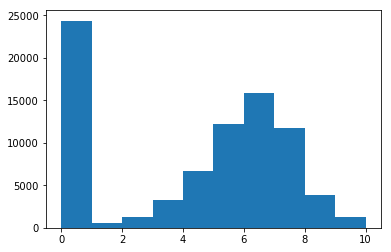

In [44]:
plt.hist(games["average_rating"])
plt.show()

In [45]:
# remove games without ratings
games = games[games["users_rated"] > 0]

# remove any row with missing values
print(games.shape)
games.dropna(inplace=True)
print(games.shape)

(56932, 20)
(56894, 20)


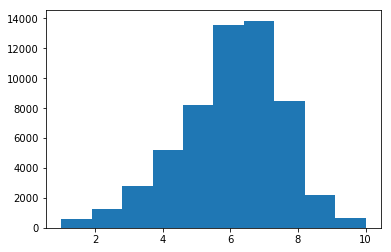

In [46]:
plt.hist(games["average_rating"])
plt.show()

In [61]:
kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = games.select_dtypes(include=["number"])
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_

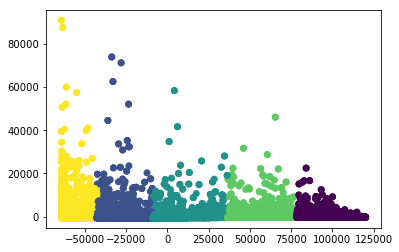

In [97]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [104]:
games.corr()["average_rating"].sort_values()

minplayers             -0.032701
maxplayers             -0.008335
minplaytime             0.043985
playingtime             0.048994
maxplaytime             0.048994
yearpublished           0.108461
total_weights           0.109691
users_rated             0.112564
total_traders           0.119452
total_comments          0.123714
total_owners            0.137478
total_wishers           0.171375
total_wanters           0.196566
minage                  0.210049
bayes_average_rating    0.231563
id                      0.304201
average_weight          0.351081
average_rating          1.000000
Name: average_rating, dtype: float64

In [108]:
columns = games.columns.tolist()
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name"]]
target = "average_rating"

In [115]:
train = games.sample(frac=0.8, random_state=1)
test = games.loc[~games.index.isin(train.index)]
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [118]:
model = LinearRegression()
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
predictions = model.predict(test[columns])
mean_squared_error(predictions, test[target])

1.8239281903519868

In [126]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
model.fit(train[columns], train[target])
predictions = model.predict(test[columns])
mean_squared_error(predictions, test[target])

1.4144642407044481